#📌 Extracción

In [46]:
url_api_telecom = "https://raw.githubusercontent.com/mhonate/TelecomX-challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"


In [47]:
import pandas as pd
import requests
import numpy as np

In [48]:
#Vamos a crear nuestro dataset de clientes
df = pd.read_json(url_api_telecom)

In [49]:
#veamos las primeras 5 filas del dataframe
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [50]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [51]:
# Normalizar columnas:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Eliminar columnas anidadas
df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

#Agregar columnas normalizadas
df_normalizado = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

df_normalizado.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [52]:
#Verificar columnas creadas
df_normalizado.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [53]:
#Renombrar columnas:
df_normalizado.rename(columns={
    'customerID': 'ID',
    'Churn':'cancelado',
    'gender': 'genero',
    'SeniorCitizen': 'mayor_de_65',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependientes',
    'tenure': 'meses_de_contrato',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'soporte_en_linea',
    'DeviceProtection': 'proteccion_dispositivos',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'servicio_tv',
    'StreamingMovies': 'servicio_peliculas',
    'PaperlessBilling': 'facturas_electronicas',
    'PaymentMethod': 'metodo_pago',
    'Contract': 'tipo_contrato',
    'Charges.Monthly': 'gasto_mensual',
    'Charges.Total': 'gasto_total'
}, inplace=True)

In [54]:
df_normalizado.head()

,ID,cancelado,genero,mayor_de_65,tiene_pareja,tiene_dependientes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gasto_mensual,gasto_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [55]:
#verificando errores de formato
for col in ['ID', 'cancelado', 'genero', 'mayor_de_65',
       'tiene_pareja', 'tiene_dependientes', 'meses_de_contrato',
       'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
       'seguridad_en_linea', 'soporte_en_linea', 'proteccion_dispositivos',
       'soporte_tecnico', 'servicio_tv', 'servicio_peliculas',
       'facturas_electronicas', 'metodo_pago', 'tipo_contrato',
       'gasto_mensual', 'gasto_total']:
    print(f"Valores únicos para la columna '{col}':")
    print(df_normalizado[col].unique())
    print("-" * 20)

Valores únicos para la columna 'ID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------
Valores únicos para la columna 'cancelado':
['No' 'Yes' '']
--------------------
Valores únicos para la columna 'genero':
['Female' 'Male']
--------------------
Valores únicos para la columna 'mayor_de_65':
[0 1]
--------------------
Valores únicos para la columna 'tiene_pareja':
['Yes' 'No']
--------------------
Valores únicos para la columna 'tiene_dependientes':
['Yes' 'No']
--------------------
Valores únicos para la columna 'meses_de_contrato':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
Valores únicos para la columna 'servicio_telefonico':
['Yes' 'No']
--------------------
Valores únicos para la columna 'lineas_multiples':
['No' 'Yes' 'No pho

In [56]:

#limpieza columna id del cliente
df_normalizado['ID'] = df_normalizado['ID'].str.strip()
df_normalizado['ID'].sample(4)

,ID
3267,4558-CGYCZ
3146,4385-ZKVNW
2065,2907-ILJBN
3843,5261-QSHQM


In [57]:
#limpieza de la columna tipo_contrato
df_normalizado['tipo_contrato'] = df_normalizado['tipo_contrato'].str.lower()
df_normalizado['tipo_contrato'] = df_normalizado['tipo_contrato'].str.replace(r'\-', ' ', regex=True).str.strip()
df_normalizado['tipo_contrato'].sample(4)

,tipo_contrato
3933,month to month
3902,month to month
6999,month to month
6438,month to month


In [58]:
#liempaza de la columna metodo_pago
df_normalizado['metodo_pago'] = df_normalizado['metodo_pago'].str.lower()
df_normalizado['metodo_pago'] = df_normalizado['metodo_pago'].str.replace(r'', '', regex=True).str.strip()


df_normalizado['metodo_pago'].sample(4)

,metodo_pago
3645,electronic check
3948,electronic check
2457,electronic check
1752,electronic check


In [59]:
#Eliminando los espacios de la columna gasto total
df_normalizado['gasto_total'] = df_normalizado['gasto_total'].replace(' ', np.nan)
#convirtiendo el tipo de dato
df_normalizado['gasto_total'] = pd.to_numeric(df_normalizado['gasto_total'], errors='coerce')
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7267 non-null   object 
 1   cancelado                7267 non-null   object 
 2   genero                   7267 non-null   object 
 3   mayor_de_65              7267 non-null   int64  
 4   tiene_pareja             7267 non-null   object 
 5   tiene_dependientes       7267 non-null   object 
 6   meses_de_contrato        7267 non-null   int64  
 7   servicio_telefonico      7267 non-null   object 
 8   lineas_multiples         7267 non-null   object 
 9   servicio_internet        7267 non-null   object 
 10  seguridad_en_linea       7267 non-null   object 
 11  soporte_en_linea         7267 non-null   object 
 12  proteccion_dispositivos  7267 non-null   object 
 13  soporte_tecnico          7267 non-null   object 
 14  servicio_tv             

In [60]:

df_normalizado['gasto_total'].isna().sum()

np.int64(11)

In [61]:

# Eliminar registros con cargos_totales faltantes
df_normalizado = df_normalizado.dropna(subset=['gasto_total'])

# Verificación rápida
print(f"Número de registros después de limpieza: {len(df_normalizado)}")

Número de registros después de limpieza: 7256


In [62]:

col_binario = ['cancelado','tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'facturas_electronicas']
df_normalizado[col_binario].sample(4)

,cancelado,tiene_pareja,tiene_dependientes,servicio_telefonico,facturas_electronicas
2021,,No,Yes,Yes,Yes
720,Yes,No,No,Yes,Yes
1839,No,No,No,Yes,No
955,No,No,No,Yes,No


In [63]:
## Transformar columnas binarias  'Yes' en 1 y 'No' en 0: para analizar estas columna

df_normalizado.loc[:, col_binario] = df_normalizado[col_binario].astype(str)
df_normalizado.loc[:, col_binario] = df_normalizado.loc[:, col_binario].replace({'Yes': 1, 'No': 0, '': np.nan})
df_normalizado.loc[:, col_binario] = df_normalizado.loc[:, col_binario].fillna(0)
df_normalizado[col_binario].sample(4)

/tmp/ipython-input-2964076427.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado.loc[:, col_binario] = df_normalizado.loc[:, col_binario].replace({'Yes': 1, 'No': 0, '': np.nan})
/tmp/ipython-input-2964076427.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado.loc[:, col_binario] = df_normalizado.loc[:, col_binario].fillna(0)


,cancelado,tiene_pareja,tiene_dependientes,servicio_telefonico,facturas_electronicas
6890,0.0,1,1,1,1
6963,0.0,0,0,1,1
6083,0.0,0,0,1,1
148,0.0,1,0,1,1


In [64]:
df_normalizado[col_binario] = df_normalizado[col_binario].astype(np.int64)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7256 non-null   object 
 1   cancelado                7256 non-null   int64  
 2   genero                   7256 non-null   object 
 3   mayor_de_65              7256 non-null   int64  
 4   tiene_pareja             7256 non-null   int64  
 5   tiene_dependientes       7256 non-null   int64  
 6   meses_de_contrato        7256 non-null   int64  
 7   servicio_telefonico      7256 non-null   int64  
 8   lineas_multiples         7256 non-null   object 
 9   servicio_internet        7256 non-null   object 
 10  seguridad_en_linea       7256 non-null   object 
 11  soporte_en_linea         7256 non-null   object 
 12  proteccion_dispositivos  7256 non-null   object 
 13  soporte_tecnico          7256 non-null   object 
 14  servicio_tv              7256

#📊 Carga y análisis

In [74]:
#Análisis descriptivo de los datos
df_normalizado.describe()

,cancelado,mayor_de_65,tiene_pareja,tiene_dependientes,meses_de_contrato,servicio_telefonico,facturas_electronicas,gasto_mensual,gasto_total
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000


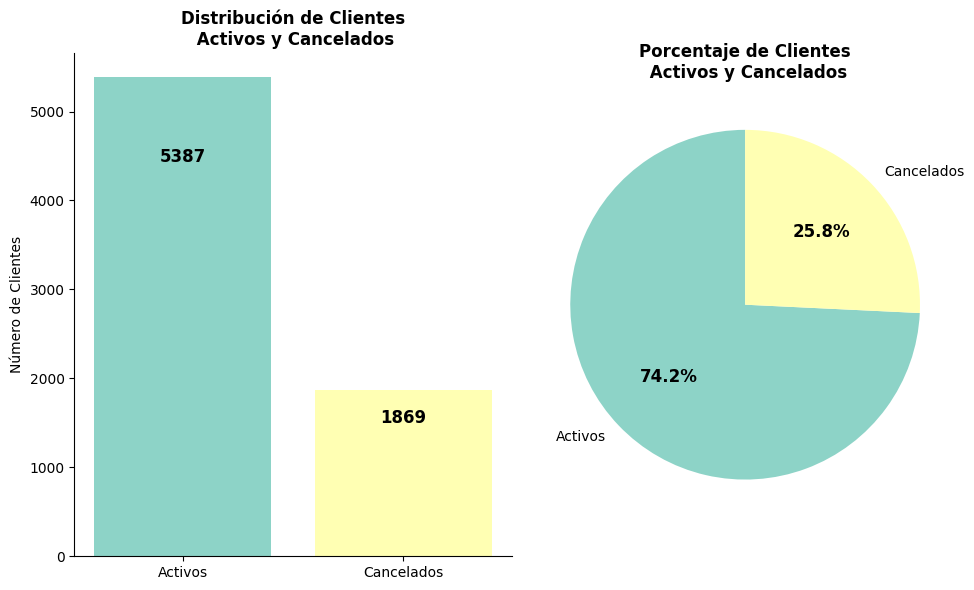

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

abandono_counts = df_normalizado["cancelado"].value_counts().sort_index()
abandono_props = df_normalizado["cancelado"].value_counts(normalize=True).sort_index()
labels = ["Permanecen", "Cancelan"]
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
colors = sns.color_palette("Set3")


# Gráfico de pastel
def custom_autopct(pct):
    return f'{pct:.1f}%'

wedges, texts, autotexts = axs[1].pie(
    abandono_counts.values,
    labels=abandono_counts.index.map({0: 'Activos', 1: 'Cancelados'}),
    autopct=custom_autopct,
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10})


for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

axs[1].set_title('Porcentaje de Clientes\n Activos y Cancelados', fontsize=12, weight='bold', loc='center')


# Gráfico de barras
bars = axs[0].bar(
    abandono_counts.index.map({0: 'Activos', 1: 'Cancelados'}),
    abandono_counts.values,
    color=colors
)

for ax in axs.flat:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

axs[0].set_title('Distribución de Clientes\n Activos y Cancelados', fontsize=12, weight='bold', loc='center')
axs[0].set_ylabel('Número de Clientes')

# Asignar Texto dentro de las barras
for bar in bars:
    height = bar.get_height()
    axs[0].text(
        bar.get_x() + bar.get_width() / 2,
        height /1.2,
        f'{height:.0f}',
        ha='center',
        va='center',
        fontsize=12,
        fontweight='bold',
        color='black')

axs[0].grid(False)

plt.tight_layout()
plt.show()

In [79]:
# Distribución de cancelación por categoría (Variables categóricas)
def analisis_evasion_categoria(df, columna):
    analisis = pd.crosstab(df_normalizado[columna], df_normalizado['cancelado'], normalize='index') * 100
    analisis.columns = ['% Activo', '% Cancelado']
    print(f'\nAnálisis para: {columna}')
    print(analisis)
    return analisis

# Variables categóricas a analizar
categoricas = ['genero', 'tipo_contrato', 'metodo_pago', 'servicio_internet']

# Aplicar análisis
resultados = {}
for cat in categoricas:
    resultados[cat] = analisis_evasion_categoria(df_normalizado, cat)


Análisis para: genero
         % Activo  % Cancelado
genero                        
Female  73.822135    26.177865
Male    74.652494    25.347506

Análisis para: tipo_contrato
                 % Activo  % Cancelado
tipo_contrato                         
month to month  58.676654    41.323346
one year        89.064559    10.935441
two year        97.230237     2.769763

Análisis para: metodo_pago
                            % Activo  % Cancelado
metodo_pago                                      
bank transfer (automatic)  83.742911    16.257089
credit card (automatic)    85.194639    14.805361
electronic check           56.196319    43.803681
mailed check               81.412191    18.587809

Análisis para: servicio_internet
                    % Activo  % Cancelado
servicio_internet                        
DSL                81.514297    18.485703
Fiber optic        59.443402    40.556598
No                 92.825397     7.174603


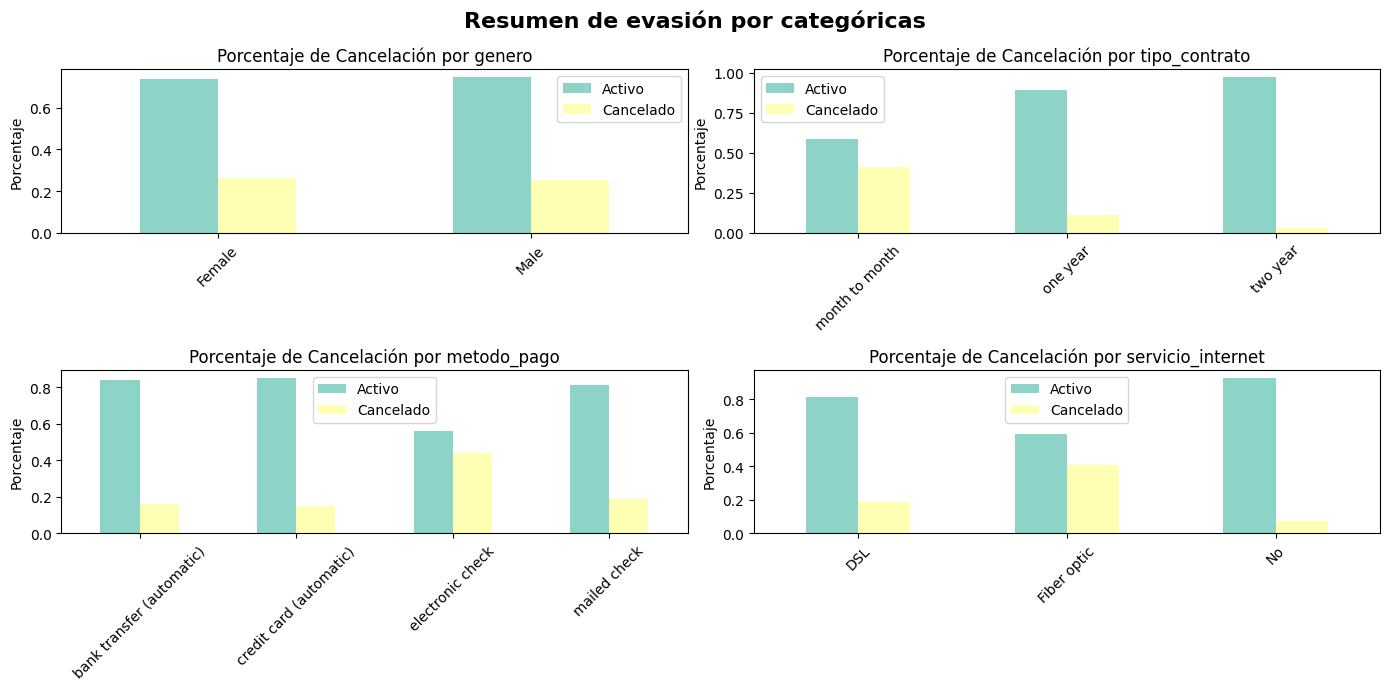

In [81]:

# Gráfica por Análisis de Categorías
fig, axes = plt.subplots(nrows=(len(categoricas) + 1) // 2, ncols=2, figsize=(14, 7))
axes = axes.flatten()
colors = sns.color_palette("Set3")

# Crear cada gráfico en su subplot
for i, cat in enumerate(categoricas):
    cruzado = pd.crosstab(df_normalizado[cat], df_normalizado['cancelado'], normalize='index')
    cruzado.plot(kind='bar', ax=axes[i], color=colors)

    axes[i].set_title(f'Porcentaje de Cancelación por {cat}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Porcentaje')
    axes[i].legend(['Activo', 'Cancelado'])
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Resumen de evasión por categóricas', fontsize=16, weight='bold', ha='center')

plt.tight_layout()
plt.show()

In [73]:
# Evasión por variables numéricas
variables_numericas = ['meses_de_contrato', 'gasto_mensual', 'gasto_total']
def analisis_evasion_numericas(df_normalizado, columnas, bins=4):

    resultados = {}

    for col in columnas:
        # Crear intervalos
        df_normalizado[f'{col}_bin'] = pd.qcut(df_normalizado[col], q=bins, duplicates='drop')

        # Tabla cruzada
        cruzada = pd.crosstab(df_normalizado[f'{col}_bin'], df_normalizado['cancelado'], normalize='index') * 100
        cruzada.columns = ['% Activo', '% Cancelado']

        print(f'\nAnálisis por rangos para: {col}')
        print(cruzada)

        resultados[col] = cruzada

    return resultados


resultados_numericas = analisis_evasion_numericas(df_normalizado, variables_numericas, bins=5)


Análisis por rangos para: meses_de_contrato
                        % Activo  % Cancelado
meses_de_contrato_bin                        
(0.999, 6.0]           48.590164    51.409836
(6.0, 20.0]            67.456446    32.543554
(20.0, 40.0]           78.305785    21.694215
(40.0, 60.0]           84.924623    15.075377
(60.0, 72.0]           93.590627     6.409373

Análisis por rangos para: gasto_mensual
                    % Activo  % Cancelado
gasto_mensual_bin                        
(18.249, 25.05]    91.114149     8.885851
(25.05, 58.7]      75.763889    24.236111
(58.7, 79.1]       71.114168    28.885832
(79.1, 94.3]       64.872326    35.127674
(94.3, 118.75]     68.206897    31.793103

Análisis por rangos para: gasto_total
                    % Activo  % Cancelado
gasto_total_bin                          
(18.799, 266.6]    55.509642    44.490358
(266.6, 939.7]     72.019297    27.980703
(939.7, 2033.85]   79.807030    20.192970
(2033.85, 4479.2]  77.601654    22.398346
(4479.2

#📄Informe final

##**Introducción**
En el presente informe se muestra el análisis comprensivo de los factores que influyen en la evasión de clientes en la organziación.

La cancelación de clientes es un problema para la organziación, por lo cual se pretende representar un análisis sobre las causas que llevan a los clientes a cancelar los productos o servicios que se disponen para ellos.

Realziar este análisis permite crear estrategias para mejorar las acciones que permitan retener a los clientes.

A través de este análisis se busca además identificar patrones o insight que ayuden a retener clientes y mejorar el modelo de ingresos de la organización.

#**Limpieza y Tratamiento de Datos**
Se realizaron las siguientes acciones:

1.-Se importó los datos desde API de Telecom X (Estos datos estaban en formato JSON).

2.-Se analizó la Información general del DataFrame

3.-Se normalizaron columnas

4.-Se eliminaron columnas anidadas

5.-Se modificaron las columnas anidadas (agregar)

6.-Se verificó la creación de columnas

7.-Se Renombraron columnas

8.-Se verificaron errores de formato

9.-Se eliminaron espacios y corrigieron los tipos de formatos.

10.- Se hizo análisis descriptivo de datos

#**Análisis Exploratorio de Datos**
: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.



**Se realizó un análisis estadístico de la data**

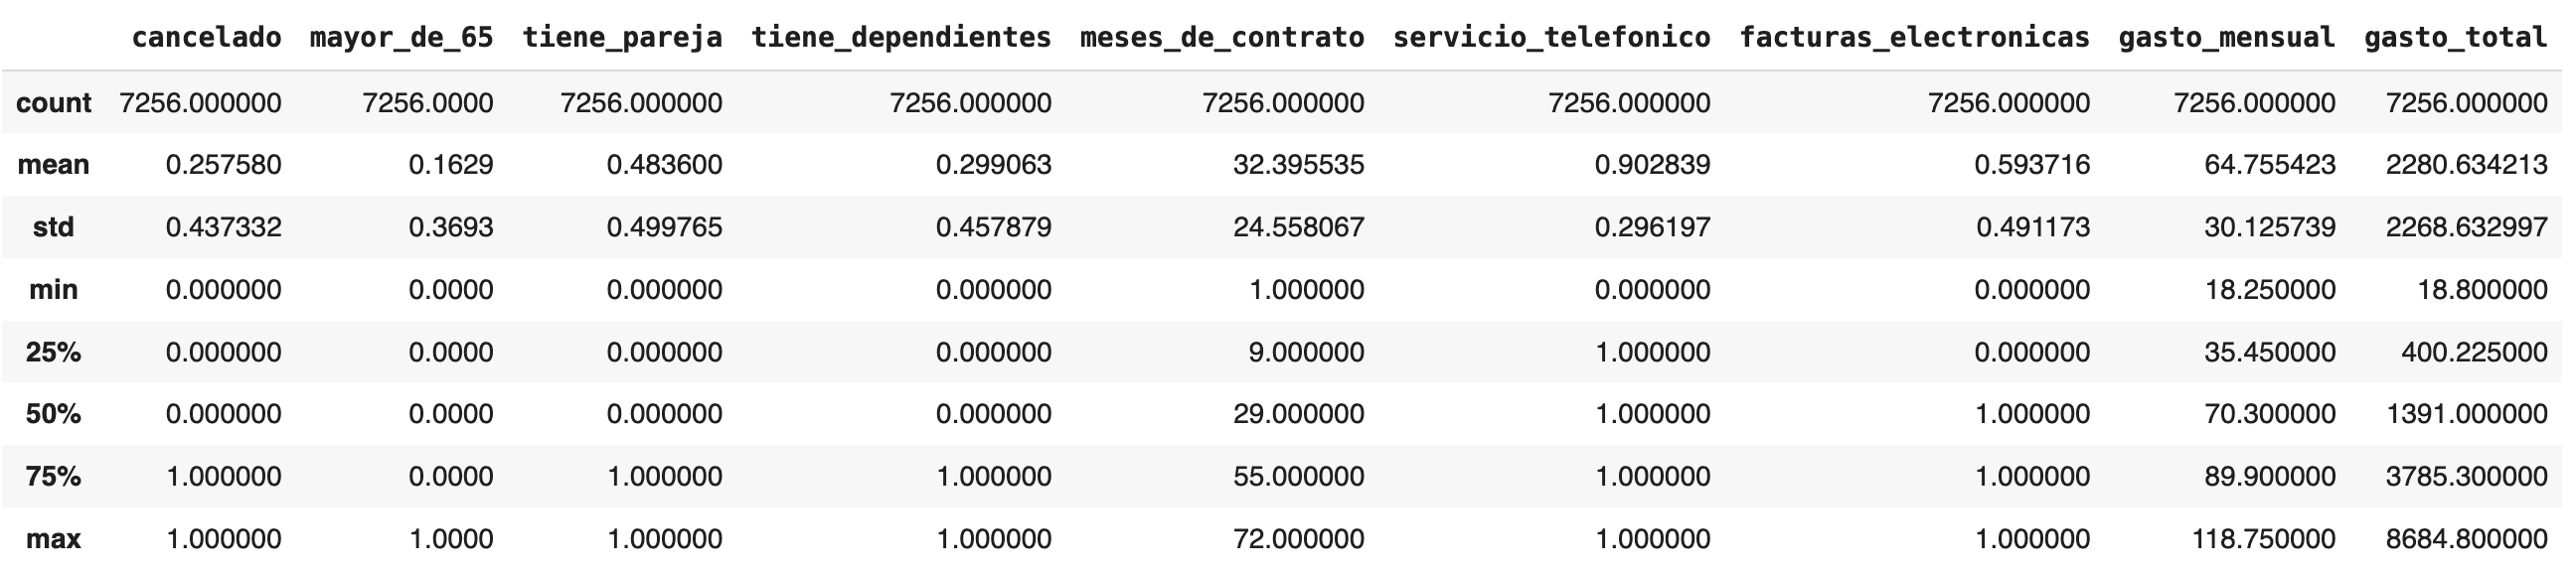

**Se visualizó la distribución de la evasión**

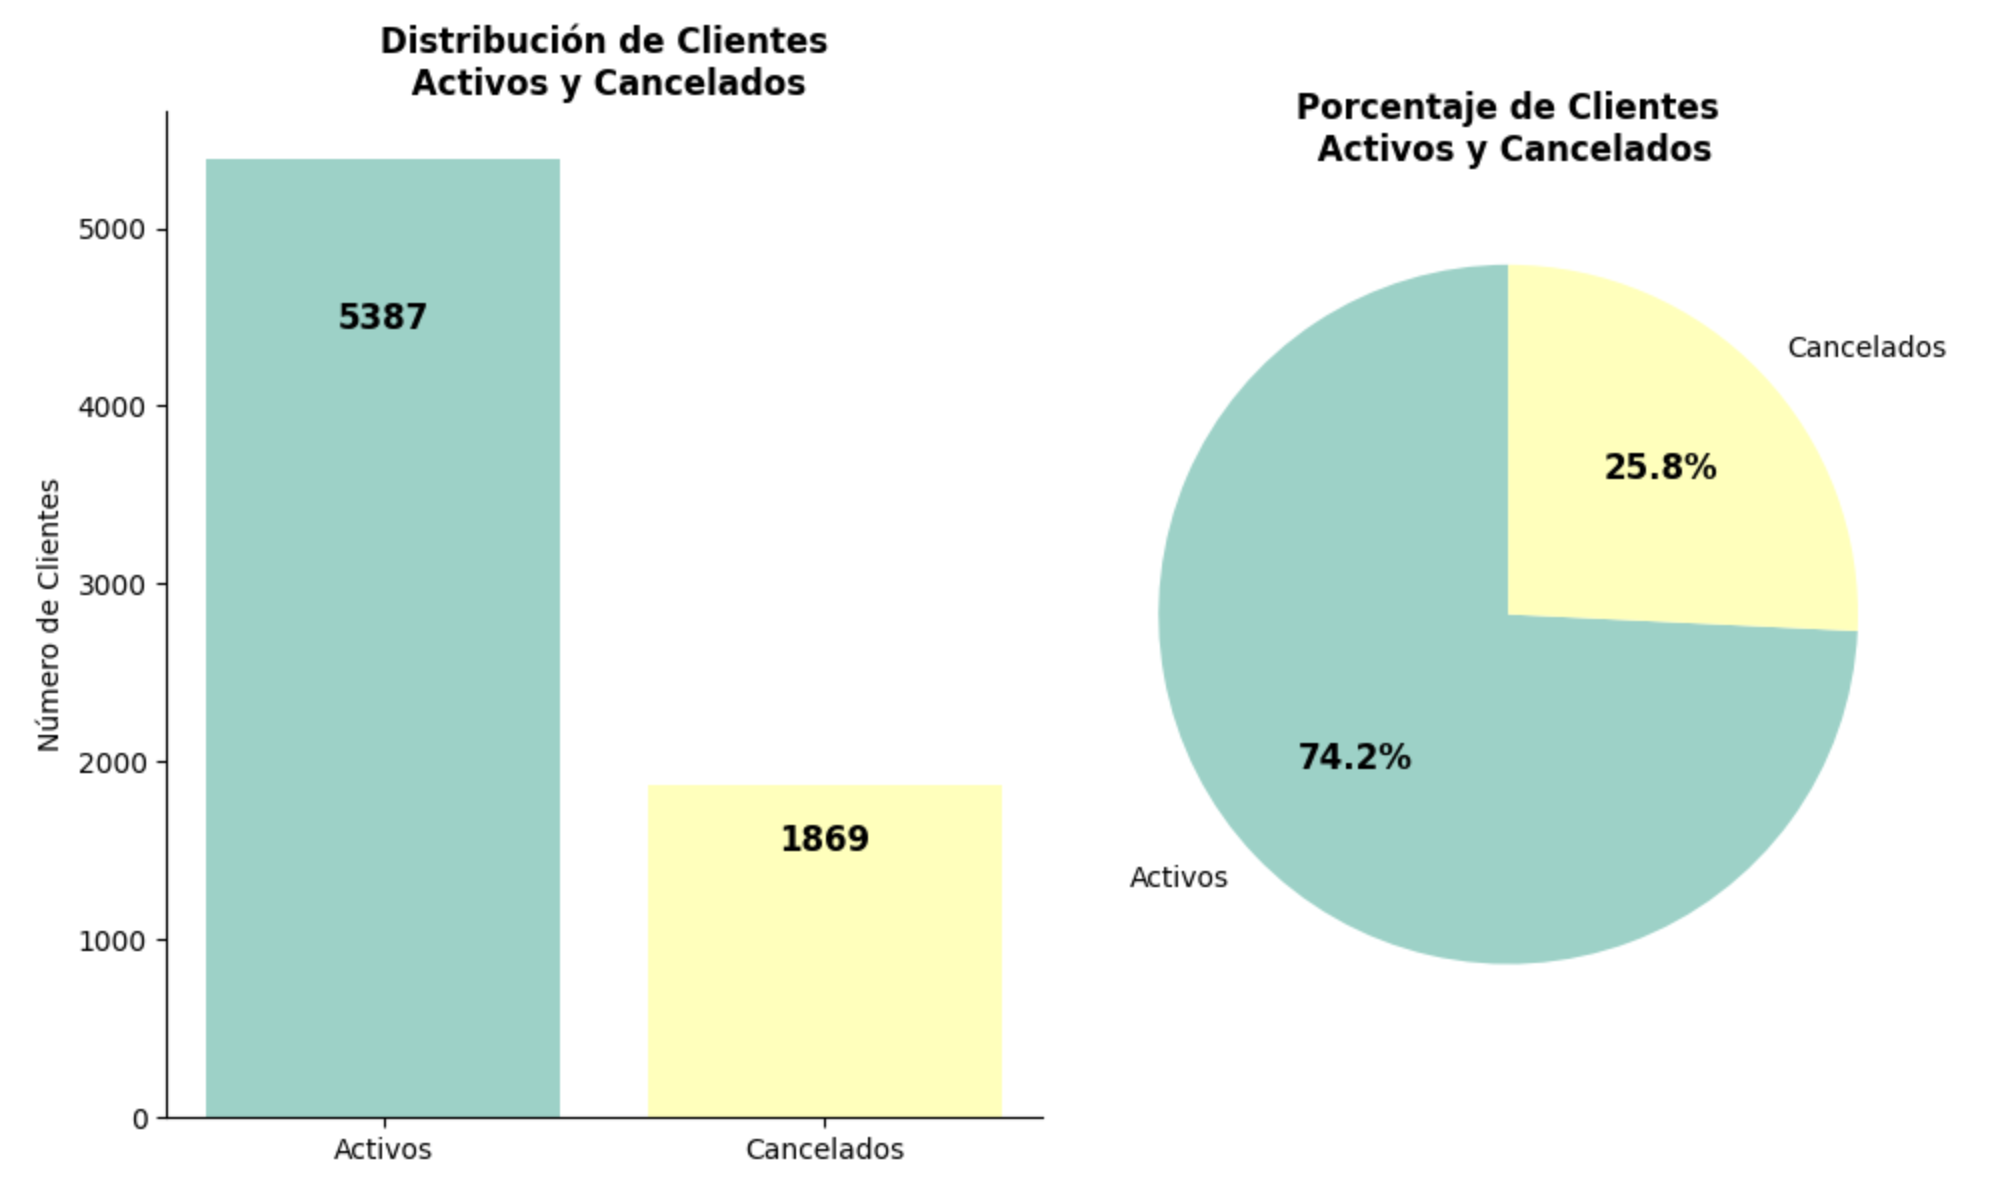

** Se realizó análisis por variables categóricas.**

Se consideró el "Tipo de Contrato", "El método de pago" , el "género" y "Servicio  de Internet".



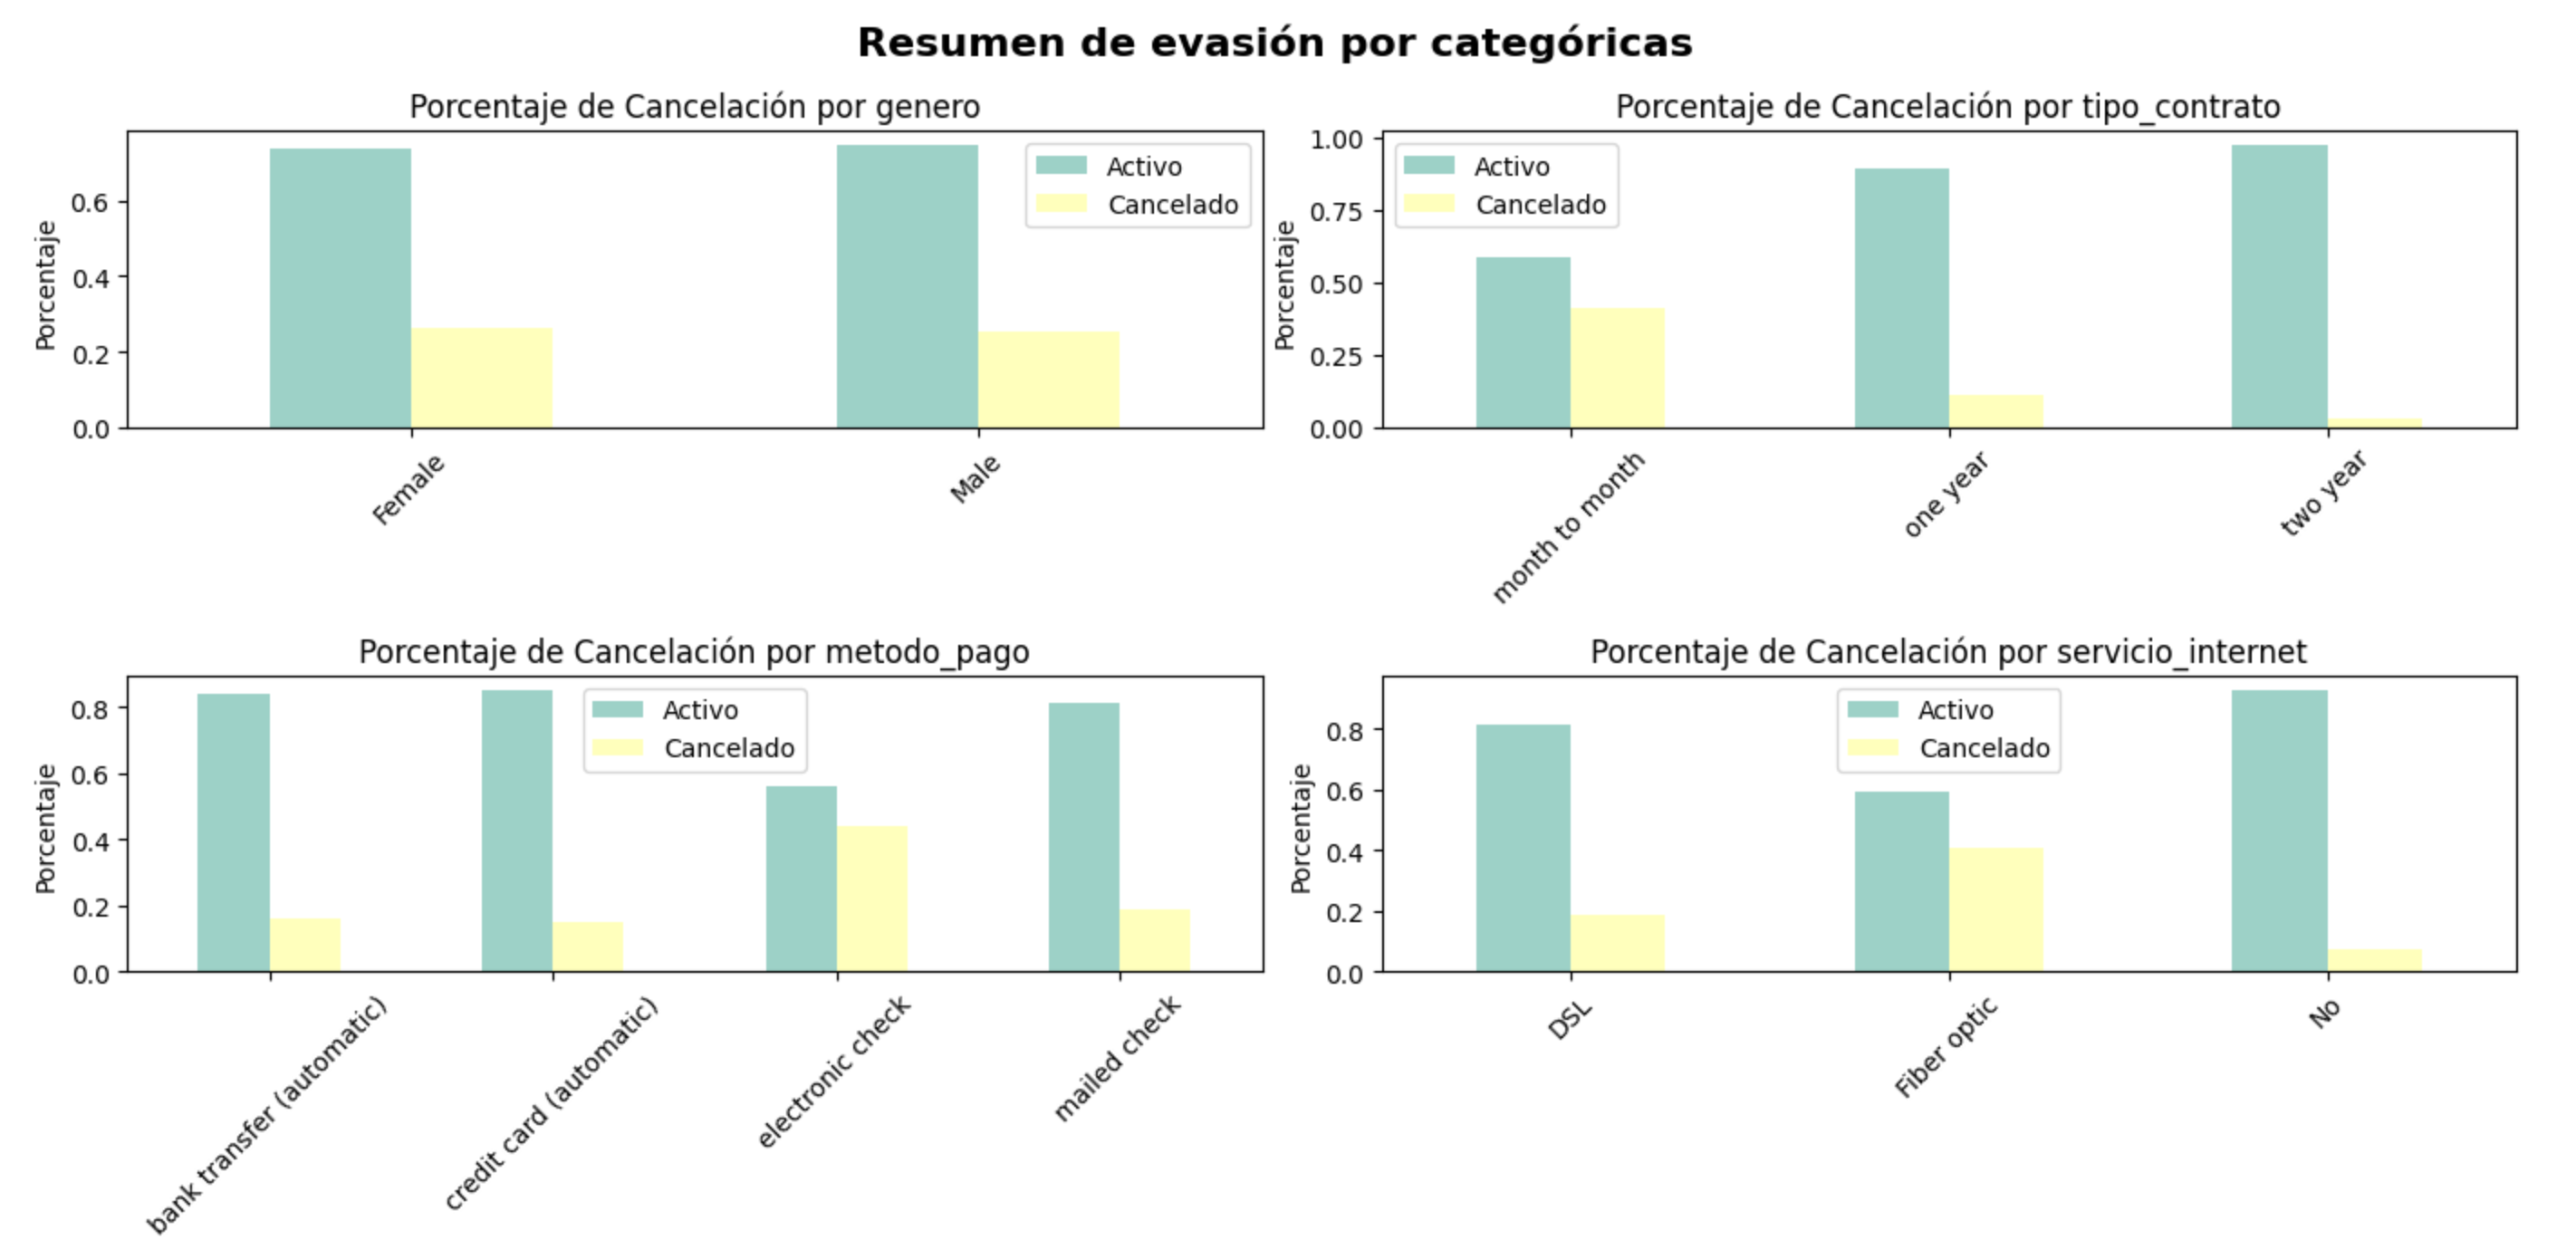

#**Conclusiones e Insights**




Luego del análisis realizado se encuentran las siguientes definiciones:

De acuerdo a este análisis se observa que los contratos mes a mes son los que tienen mayor evasión.

El método de pagó electronic check es el que presenta una mayor evasion, dado porque es un pago que se realiza por parte del cliente en un momento determinado, esto comparado con los pagos automáticos es sustancialmente diferente.

No hay diferencias entre hombres o mujeres en la evasión.

Sobre el servicio de internet se evaluó dado que por tipo de producto contratado podría influir en la evasión.


#**Recomendaciones**


1.-Se debe trabajar en pasar de contratos mes a mes a otros de largo plazo, pudiendo generar ofertas para cambios con mayor duración de los contratos.

2.-Crear ofertas o promociones para generar mayor enganche con el pago mediante pagos automáticos o cargos a cuenta, evitando el problema de pago no recurrente con cargo automático. O bien se puede evaluar si el proceso de recordatorios de pago hace que el indicador mejore.

3.-El tipo de servicio por ejemplo podría derivar en ofertas que permitan la migracióna diferentes tipos de servicios, evaluando los beneficios de uno u otro, así como establecer estrategias de cambio de servicios mejorando las condiciones.


